# Análise de Grafos - Trabalho Prático Final

Este notebook apresenta a **Etapa 1** do trabalho prático de GCC218 - Algoritmos em Grafos e GCC262 - Grafos e suas Aplicações, com foco no pré-processamento de dados e cálculo de diversas estatísticas de grafos.

O problema estudado envolve a otimização do fluxo de bens e serviços em um multigrafo conectado $G=(V,E,A)$, onde $V$ é o conjunto de nós, $E$ o conjunto de arestas e $A$ o conjunto de arcos (vias de mão única). Serviços são requeridos para subconjuntos de nós ($V_R$), arestas ($E_R$) e arcos ($A_R$). O objetivo final é encontrar um conjunto de viagens de veículos com custo mínimo, atendendo cada aresta requerida por uma única viagem e respeitando a capacidade de cada veículo.

--- 

## 1. Carregamento dos Dados

Nesta seção, o script `teste_uso.py` é executado para realizar a leitura e o pré-processamento dos dados a partir de um arquivo de instância no formato `.dat`. O nome do arquivo é passado como argumento para o script, simulando uma execução via linha de comando.

In [ ]:
import importlib.util
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o script com a lógica do grafo
script_path = "teste_uso.py"

# Nome do arquivo de dados que você quer processar
# ALtere 'DI-NEARP-n240-Q16k.dat' para o nome do seu arquivo .dat

# Lembre-se de digitar antes o nome da pasta onde o arquivo está localizado
# Exemplo: 'instancias/DI-NEARP-n240-Q16k.dat'
nome_do_arquivo_dat = 'instancias/BHW1.dat'

# Salva o sys.argv original
original_sys_argv = sys.argv

# Simula sys.argv para o script teste_uso.py
# O primeiro elemento é o nome do script, o segundo é o argumento do arquivo
sys.argv = [script_path, nome_do_arquivo_dat]

try:
    # Carrega o módulo dinamicamente
    spec = importlib.util.spec_from_file_location("estatisticas_grafo", script_path)
    estatisticas_grafo = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(estatisticas_grafo)
finally:
    # Restaura o sys.argv original para não afetar outras partes do notebook
    sys.argv = original_sys_argv

print("Dados carregados com sucesso. As informações detalhadas e estatísticas serão apresentadas a seguir.")


=== DADOS GERAIS ===
Name: BHW1
Optimal value: -1
#Vehicles: -1
Capacity: 5
Depot Node: 1
#Nodes: 12
#Edges: 11
#Arcs: 22
#Required N: 7
#Required E: 11
#Required A: 11

=== REQUIRED NODES ===
{'node': 'N4', 'demand': 1, 'service_cost': 1}
{'node': 'N3', 'demand': 1, 'service_cost': 1}
{'node': 'N10', 'demand': 1, 'service_cost': 1}
{'node': 'N2', 'demand': 1, 'service_cost': 1}
{'node': 'N11', 'demand': 1, 'service_cost': 1}
{'node': 'N12', 'demand': 1, 'service_cost': 1}
{'node': 'N7', 'demand': 1, 'service_cost': 1}

=== REQUIRED EDGES ===
{'edge': 'E1', 'from': 2, 'to': 3, 'traversal_cost': 18, 'demand': 1, 'service_cost': 19}
{'edge': 'E2', 'from': 2, 'to': 4, 'traversal_cost': 9, 'demand': 1, 'service_cost': 10}
{'edge': 'E3', 'from': 2, 'to': 9, 'traversal_cost': 2, 'demand': 1, 'service_cost': 3}
{'edge': 'E4', 'from': 5, 'to': 6, 'traversal_cost': 7, 'demand': 1, 'service_cost': 8}
{'edge': 'E5', 'from': 5, 'to': 11, 'traversal_cost': 20, 'demand': 1, 'service_cost': 21}
{'ed

--- 

## 2. Estatísticas do Grafo

Nesta seção, apresentamos as principais características do grafo, calculadas a partir dos dados de entrada. As métricas calculadas incluem a quantidade de vértices, arestas, arcos (requeridos e não requeridos), densidade, componentes conectados, graus dos vértices, intermediação, caminho médio e diâmetro.

### 2.1. Dados Gerais da Instância

Uma visão geral das informações contidas no arquivo de entrada, fornecendo detalhes sobre a instância do problema.

In [5]:
df_dados_gerais = pd.DataFrame(list(estatisticas_grafo.dados_gerais.items()), columns=['Métrica', 'Valor'])
display(df_dados_gerais)

,Métrica,Valor
0,Name,BHW1
1,Optimal value,-1
2,#Vehicles,-1
3,Capacity,5
4,Depot Node,1
5,#Nodes,12
6,#Edges,11
7,#Arcs,22
8,#Required N,7
9,#Required E,11


### 2.2. Quantidade de Elementos do Grafo

Contagem detalhada dos componentes do grafo, incluindo vértices, arestas e arcos, e a distinção entre elementos gerais e requeridos para serviço.

In [ ]:
data_quantidades = {
    "Métrica": [
        "Quantidade de Vértices Totais",
        "Quantidade de Arestas Não Direcionadas Totais",
        "Quantidade de Arcos Direcionados Totais",
        "Quantidade de Vértices Requeridos",
        "Quantidade de Arestas Requeridas",
        "Quantidade de Arcos Requeridos"
    ],
    "Valor": [
        estatisticas_grafo.qtd_vertices,
        estatisticas_grafo.qtd_arestas,
        estatisticas_grafo.qtd_arcos,
        estatisticas_grafo.qtd_vertices_requeridos,
        estatisticas_grafo.qtd_arestas_requeridas,
        estatisticas_grafo.qtd_arcos_requeridos
    ]
}
df_quantidades = pd.DataFrame(data_quantidades)
display(df_quantidades)

### 2.3. Densidade do Grafo

A densidade do grafo mede quão "completo" o grafo é em relação ao número máximo possível de conexões. Uma densidade alta indica um grafo mais denso, com muitas conexões, enquanto uma densidade baixa sugere um grafo esparso.

In [6]:
data_densidade = {
    "Tipo de Densidade": ["Considerando Arcos Direcionados", "Considerando Arestas Não Direcionadas"],
    "Valor": [f"{estatisticas_grafo.densidade_arcos:.4f}", f"{estatisticas_grafo.densidade_arestas:.4f}"]
}
df_densidade = pd.DataFrame(data_densidade)
display(df_densidade)

print(f"\nUma densidade de {estatisticas_grafo.densidade_arcos:.4f} para arcos direcionados e {estatisticas_grafo.densidade_arestas:.4f} para arestas não direcionadas indica que o grafo é relativamente { 'esparso' if estatisticas_grafo.densidade_arcos < 0.5 or estatisticas_grafo.densidade_arestas < 0.5 else 'denso'}.")
print("\n**Observação sobre 'Order Strength':**")
print("'Order strength' geralmente se refere a grafos direcionados e mede a proporção de pares de nós")
print("que têm uma aresta direcionada entre eles (em qualquer direção). A 'densidade do grafo'")
print("para grafos direcionados, como calculado acima com os arcos, é uma métrica relacionada.")
print("Se você tiver informações específicas sobre como 'order strength' é definida para o seu contexto,")
print("pode ser necessário um cálculo ligeiramente diferente, talvez considerando a existência de uma")
print("conexão (em qualquer direção) entre pares de nós.")

,Tipo de Densidade,Valor
0,Considerando Arcos Direcionados,0.1667
1,Considerando Arestas Não Direcionadas,0.1667



Uma densidade de 0.1667 para arcos direcionados e 0.1667 para arestas não direcionadas indica que o grafo é relativamente esparso.

**Observação sobre 'Order Strength':**
'Order strength' geralmente se refere a grafos direcionados e mede a proporção de pares de nós
que têm uma aresta direcionada entre eles (em qualquer direção). A 'densidade do grafo'
para grafos direcionados, como calculado acima com os arcos, é uma métrica relacionada.
Se você tiver informações específicas sobre como 'order strength' é definida para o seu contexto,
pode ser necessário um cálculo ligeiramente diferente, talvez considerando a existência de uma
conexão (em qualquer direção) entre pares de nós.


### 2.4. Componentes Conectados

A identificação de componentes conectados nos mostra os subgrafos onde cada nó está conectado a todos os outros nós no mesmo componente. Isso é fundamental para entender a conectividade geral do grafo.

In [7]:
print("Foram encontrados os seguintes componentes conectados:")
for i, componente in enumerate(estatisticas_grafo.componentes):
    print(f"- Componente {i+1} (Tamanho: {len(componente)}): {list(componente)}")
print(f"\nNúmero total de componentes conectados: **{len(estatisticas_grafo.componentes)}**")

Foram encontrados os seguintes componentes conectados:
- Componente 1 (Tamanho: 11): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Número total de componentes conectados: **1**


### 2.5. Grau dos Vértices (Mínimo, Máximo e Distribuição)

O grau de um vértice é o número de arestas (ou arcos) conectadas a ele. A análise do grau mínimo, máximo e da distribuição de graus fornece insights sobre a conectividade local dos vértices.

Grau mínimo dos vértices: **4**
Grau máximo dos vértices: **10**


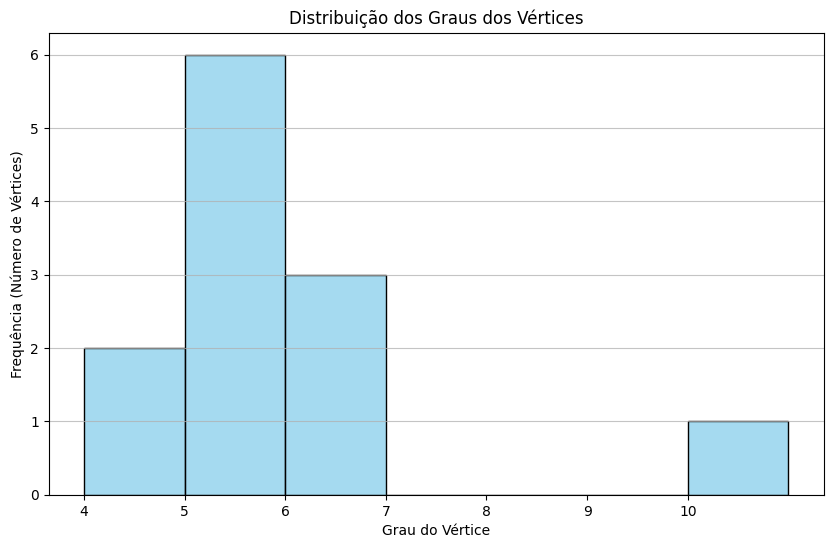

In [8]:
if estatisticas_grafo.graus:
    print(f"Grau mínimo dos vértices: **{estatisticas_grafo.grau_minimo}**")
    print(f"Grau máximo dos vértices: **{estatisticas_grafo.grau_maximo}**")

    # Criando o histograma da distribuição de graus
    plt.figure(figsize=(10, 6))
    sns.histplot(list(estatisticas_grafo.graus.values()), bins=range(min(estatisticas_grafo.graus.values()), max(estatisticas_grafo.graus.values()) + 2), kde=False, color='skyblue', edgecolor='black')
    plt.title('Distribuição dos Graus dos Vértices')
    plt.xlabel('Grau do Vértice')
    plt.ylabel('Frequência (Número de Vértices)')
    plt.xticks(range(min(estatisticas_grafo.graus.values()), max(estatisticas_grafo.graus.values()) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("Não foi possível calcular o grau dos vértices.")

### 2.6. Centralidade de Intermediação dos Nós

A centralidade de intermediação mede a frequência com que um nó aparece nos caminhos mais curtos entre outros nós. Nós com alta intermediação são cruciais para o fluxo de informações ou recursos no grafo, atuando como "pontes" ou "hubs".

In [ ]:
if estatisticas_grafo.intermediacao_nodes:
    print("Os nós com as maiores pontuações de intermediação (Top 10):")
    sorted_intermediacao = sorted(estatisticas_grafo.intermediacao_nodes.items(), key=lambda item: item[1], reverse=True)
    df_intermediacao = pd.DataFrame([{"Nó": node, "Score de Intermediação": f"{score:.4f}"} for node, score in sorted_intermediacao[:10]])
    display(df_intermediacao)
else:
    print("Não há nós para calcular a intermediação.")

### 2.7. Caminho Médio e Diâmetro do Grafo

O **caminho médio** é a média dos comprimentos dos caminhos mais curtos entre todos os pares de nós no grafo. Já o **diâmetro** é o comprimento do caminho mais longo entre quaisquer dois nós. Ambas as métricas fornecem uma visão sobre a eficiência da comunicação e o "tamanho" máximo do grafo.

In [ ]:
print("--- Dados de Caminho e Conectividade ---")
print(f"**Comprimento Médio dos Caminhos Mais Curtos**: {estatisticas_grafo.caminho_medio:.4f}")
print("Este valor indica a média das distâncias mais curtas entre todos os pares de nós no grafo. Um valor menor sugere um grafo mais eficiente em termos de comunicação.")

print(f"\n**Diâmetro do Grafo**: {estatisticas_grafo.diametro}")
if estatisticas_grafo.diametro == 0 and estatisticas_grafo.contar_vertices(estatisticas_grafo.required_edges, estatisticas_grafo.non_required_edges, estatisticas_grafo.required_arcs, estatisticas_grafo.non_required_arcs, estatisticas_grafo.required_nodes) > 0:
    print("O grafo não é conexo, portanto o diâmetro é considerado infinito (ou não definido para múltiplos componentes).")
elif estatisticas_grafo.diametro == 0:
    print("O grafo está vazio.")
print("O diâmetro representa o caminho mais longo entre quaisquer dois nós no grafo. É uma medida do 'tamanho' do grafo.")

--- 

## 3. Conclusão da Etapa 1

Esta etapa do trabalho prático permitiu a representação do problema por meio de estruturas de dados de grafos, a implementação da leitura de dados e o cálculo de diversas estatísticas importantes que fornecem uma compreensão aprofundada da estrutura e conectividade da instância do grafo. As informações coletadas são fundamentais para o desenvolvimento das próximas etapas do trabalho, especialmente a construção da solução inicial na Etapa 2.